In [1]:
import pandas as pd
import numpy as np
folder = 'd:/git/project1/data'

In [2]:
#data = pd.read_csv(f'{folder}/last_hs_tweets_ch1_0.csv')
#data

In [2]:
def load_parts(name, start, end):
    data = pd.DataFrame(None)
    for num in range(start, end):
        data_part = pd.read_csv(f'{folder}/{name}_{num*1000}.csv')
        data = data.append(data_part, sort=False, ignore_index=True)
    #res_table.to_csv(f'{folder}\cls_direct30_{num}.csv', index=False)
    return data

In [4]:
%%time
data = load_parts('last_hs_tweets_ch', 0, 285)
data

KeyboardInterrupt: 

In [5]:
%%time
data_shaffle = data.sample(frac=1)
data_shaffle

Wall time: 6.69 s


,0,1,2,3,4,5,6,7,8,9,...,764,765,766,767,retweet,time,change_1_direct,change_3_direct,change_7_direct,change_30_direct
29539,0.067619,-0.191911,0.333055,-0.316047,-0.196082,-0.307870,0.155212,0.599575,0.075366,-0.377731,...,-0.237452,-0.400821,0.124449,0.498009,16.0,8123,1.0,1.0,1.0,1.0
182174,-0.435158,0.270208,-0.122333,-0.083537,-0.576564,-0.307605,0.450483,0.432259,-0.339518,0.201194,...,0.123925,-0.367187,0.364222,0.447037,3.0,32474,0.0,1.0,1.0,1.0
92661,-0.224528,0.022610,0.037308,0.215216,-0.257777,-0.313349,0.595111,0.493954,-0.211860,-0.143109,...,-0.258319,-0.276331,0.144908,0.749112,2.0,18020,0.0,1.0,0.0,1.0
93276,0.159126,-0.362576,0.022087,0.045013,-0.096006,-0.461935,0.355241,0.502833,-0.092659,-0.233123,...,-0.500020,-0.428637,0.026432,0.646155,2.0,31512,1.0,0.0,1.0,0.0
174649,-0.435158,0.270208,-0.122333,-0.083537,-0.576564,-0.307605,0.450483,0.432259,-0.339518,0.201194,...,0.123925,-0.367187,0.364222,0.447037,3.0,32474,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55186,0.140894,-0.188134,0.140670,-0.011818,-0.030094,-0.566250,0.526216,0.621321,-0.049708,-0.384652,...,-0.196694,-0.168727,0.159127,0.275113,5.0,67797,0.0,0.0,0.0,1.0
197622,0.015909,-0.510408,0.014380,-0.189394,-0.825645,-0.245821,0.439949,0.384375,-0.027820,-0.214647,...,-0.044220,-0.302591,0.239027,0.305984,10.0,80915,0.0,0.0,0.0,1.0
115967,-0.040753,-0.076688,0.125699,0.116613,-0.148109,-0.269472,0.206317,0.701332,-0.092596,-0.347986,...,-0.472482,-0.512794,0.194736,0.425265,10.0,38565,1.0,1.0,1.0,1.0
165383,-0.435158,0.270208,-0.122333,-0.083537,-0.576564,-0.307605,0.450483,0.432259,-0.339518,0.201194,...,0.123925,-0.367187,0.364222,0.447037,3.0,32474,0.0,1.0,1.0,1.0


In [6]:
data_shaffle['retweet'].max()

181240.0

In [7]:
max = 181240
data_shaffle['retweet'] = data_shaffle['retweet'].apply(lambda x: (x - max/2)/(max/2))
data_shaffle['retweet'].max()

1.0

In [8]:
data_shaffle['time'].max()

86399

In [9]:
max = 86000
data_shaffle['time'] = data_shaffle['time'].apply(lambda x: (x - max/2)/(max/2))
data_shaffle['time'].max()

1.0092790697674419

In [15]:
#%%time
#data.corr()[target].sort_values()
data = data_shaffle.iloc[:200000,:]
test = data_shaffle.iloc[200000:,:]

In [12]:
x_train = np.array(data.iloc[:,:770])
x_train

array([[ 0.06761853, -0.19191095,  0.33305493, ...,  0.49800918,
        -0.99982344, -0.81109302],
       [-0.43515766,  0.27020758, -0.12233323, ...,  0.44703737,
        -0.99996689, -0.2447907 ],
       [-0.22452766,  0.02260985,  0.03730781, ...,  0.74911237,
        -0.99997793, -0.58093023],
       ...,
       [ 0.07922406, -0.1660024 , -0.12670968, ...,  0.47899276,
        -0.99997793,  0.73165116],
       [ 0.08661289, -0.32624972,  0.20114493, ...,  0.3261087 ,
        -0.99997793,  0.04697674],
       [-0.11927438, -0.35546553, -0.08454706, ...,  0.73504585,
        -0.99997793,  0.36930233]])

In [45]:
%%time
#test = load_parts('last_hs_tweets_ch1', 115, 230)
#test

Wall time: 0 ns


In [21]:
x_test = np.array(test.iloc[:,:770])
x_test

array([[-0.02898919, -0.03325083, -0.0399362 , ...,  0.41756785,
        -0.99997793,  0.38097674],
       [-0.4013034 ,  0.10098396,  0.115592  , ...,  0.38311478,
        -0.99945928, -0.53172093],
       [-0.6249061 , -0.407576  ,  0.07233346, ...,  0.50195795,
        -0.99997793, -0.60239535],
       ...,
       [-0.04075345, -0.07668772,  0.12569933, ...,  0.42526504,
        -0.99988965, -0.10313953],
       [-0.43515766,  0.27020758, -0.12233323, ...,  0.44703737,
        -0.99996689, -0.2447907 ],
       [-0.5946643 , -0.11601474,  0.21396062, ...,  0.52905107,
        -0.99997793, -0.49765116]])

In [134]:
target = 'change_7_direct'
#data[target].value_counts()

In [135]:
y_train = data[target].astype(int)
#y_train = data[target].apply(lambda x: -1 if x < 1 else 1)
y_train.value_counts()

1    140317
0     59683
Name: change_7_direct, dtype: int64

In [136]:
y_test = test[target].astype(int)
#y_test = test[target].apply(lambda x: -1 if x < 1 else 1)
y_test.value_counts()

1    35305
0    14695
Name: change_7_direct, dtype: int64

In [137]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
d_class_weights = dict(enumerate(class_weights))
d_class_weights

{0: 1.6755189920077744, 1: 0.7126720212091193}

In [24]:
import tensorflow
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers

In [26]:
model_num=35

In [138]:
#l2=0.05
lr=0.02

model = models.Sequential()

# activity_regularizer=regularizers.l2(l2), 
model.add(layers.Dense(400, input_shape=(770,), kernel_initializer="he_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(400, kernel_initializer="he_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

rmsprop = optimizers.RMSprop(learning_rate=lr, rho=0.9)
adam = optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, amsgrad=True)
adamax = optimizers.Adamax(learning_rate=lr, beta_1=0.9, beta_2=0.99)
nadam = optimizers.Nadam(learning_rate=lr, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['binary_accuracy'])
print(model_num)
model_num+=1

45


In [139]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
weights_file = f'{folder}/weights_pr4_{model_num}.h5'
save_weights = ModelCheckpoint(weights_file, monitor='val_binary_accuracy', mode='max', save_best_only=True)
tensorboard_cbk = TensorBoard(log_dir=f'{folder}/logs')
reduce = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=0.000001, verbose=1)

In [140]:
json_file = f'{folder}/model_pr4_{model_num}.json'
model_json = model.to_json()

#with open(json_file, 'w') as file:
    #file.write(model_json)

In [141]:
history = model.fit(x_train, y_train, class_weight=d_class_weights, epochs=25, batch_size=4000, validation_split=0.5, callbacks=[tensorboard_cbk, reduce])


Epoch 1/25
25/25 [==============================] - 22s 840ms/step - loss: 0.8879 - binary_accuracy: 0.5897 - val_loss: 0.8680 - val_binary_accuracy: 0.6871
Epoch 2/25
25/25 [==============================] - 17s 672ms/step - loss: 0.5470 - binary_accuracy: 0.6536 - val_loss: 0.6055 - val_binary_accuracy: 0.6995
Epoch 3/25
25/25 [==============================] - 17s 675ms/step - loss: 0.5345 - binary_accuracy: 0.6665 - val_loss: 0.5387 - val_binary_accuracy: 0.6837
Epoch 4/25
25/25 [==============================] - 16s 664ms/step - loss: 0.5254 - binary_accuracy: 0.6744 - val_loss: 0.5132 - val_binary_accuracy: 0.6950
Epoch 5/25
25/25 [==============================] - 16s 635ms/step - loss: 0.5235 - binary_accuracy: 0.6796 - val_loss: 0.5185 - val_binary_accuracy: 0.6827
Epoch 6/25
25/25 [==============================] - 16s 630ms/step - loss: 0.5204 - binary_accuracy: 0.6852 - val_loss: 0.5264 - val_binary_accuracy: 0.6833
Epoch 7/25
25/25 [==============================] - 16s 62

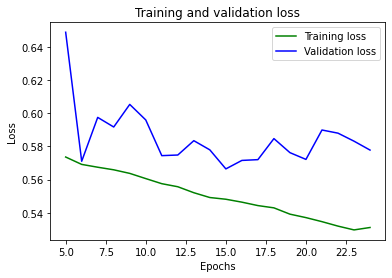

In [129]:
import matplotlib.pyplot as plt
start = 5
loss_values = history.history['loss'][start:]
val_loss_values = history.history['val_loss'][start:]
epochs = range(start, len(loss_values) + start)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

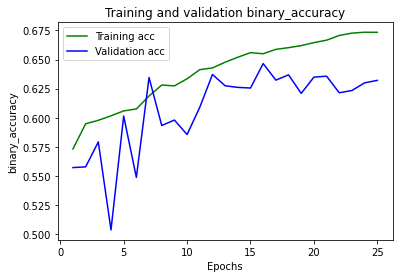

In [130]:
plt.clf()
acc_values = history.history['binary_accuracy']
val_acc_values = history.history['val_binary_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'g', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation binary_accuracy')
plt.xlabel('Epochs')
plt.ylabel('binary_accuracy')
plt.legend()
plt.show()

In [131]:
results = model.evaluate(x_test, y_test, verbose=1)

1563/1563 [==============================] - 7s 4ms/step - loss: 0.5777 - binary_accuracy: 0.6336


In [133]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
clf_dummy = DummyClassifier()

scores = cross_val_score(clf_dummy, x_test, y_test)
print("Dummy classifier score: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Dummy classifier score: 0.680 (+/- 0.00)


In [132]:
predictions = model.predict(x_test)
predictions.T

array([[0.3760522 , 0.5893599 , 0.2978202 , ..., 0.36077154, 1.        ,
        0.57056653]], dtype=float32)

In [37]:
threshold = 0.5
predictions_df = pd.DataFrame()
predictions_df[target] = [1 if val > threshold else 0 for val in predictions]
predictions_df[target].value_counts()

1    35576
0    14424
Name: change_1_direct, dtype: int64

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [39]:
#print(roc_auc_score(predictions_df[target], y_test))
print(confusion_matrix(predictions_df[target], y_test))
print(accuracy_score(predictions_df[target], y_test))

[[11841  2583]
 [14381 21195]]
0.66072


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [53]:
%%time
parameters = {'C': np.linspace(0.0001, 100, 20)}
grid_search = GridSearchCV(LogisticRegression(solver="saga"), parameters)
grid_search.fit(x_train, y_train)

print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
 

D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
 

D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\git\project1\ml\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
 

best parameters:  {'C': 0.0001}
best scrores:  0.8089999999999999
Wall time: 1min 55s


In [54]:
%%time
clf = LogisticRegression(solver="warn", C=1)
clf.fit(x_train, y_train)

Wall time: 832 ms


LogisticRegression(C=0.0001, solver='saga')

In [55]:
clf.score(x_test, y_test)

0.783

In [ ]:
pd.DataFrame(data={'score': model['lr'].coef_[0]},
                      index=column_names).sort_values(by='score')
                                         .plot(kind='barh', grid=True,
                                               figsize=(6,6), legend=False)

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
%%time
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(x_train, y_train)

Wall time: 17.5 s


RandomForestClassifier(n_estimators=1000)

In [65]:
rf.score(x_test, y_test)

0.787

In [63]:
rf_pred = rf.predict(x_test)

In [67]:
#print(roc_auc_score(predictions_df[target], y_test))
print(confusion_matrix(rf_pred, y_test))
print(accuracy_score(rf_pred, y_test))

[[783 213]
 [  0   4]]
0.787


In [ ]:
pd.DataFrame(data={'score': model['rf'].feature_importances_}, 
                      index=column_names).sort_values(by='score')
                                         .plot(kind='barh', grid=True,
                                               figsize=(6,6), legend=False)